In [1]:
# Ignore warnings (primarily for future deprecation warnings)
import warnings
# warnings.filterwarnings('ignore')

# Raster Analysis
import rasterio
import earthpy.plot as ep
from rasterio.merge import merge

# Vector Analysis
from shapely.geometry import box, mapping, Polygon

# General data manipulation
import geopandas as gpd
import pandas as pd
import numpy as np

from collections import Counter

# Saving and Accessing Data
import os
import pickle
import json

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import folium
import seaborn as sns

# Google Earth Engine
import ee
import geemap

# Machine learning

# Keras
import keras
from keras import Sequential
from keras.layers import Conv1D, Dropout, Dense, Input, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

from importlib import reload
from tqdm import tqdm

from sklearn.decomposition import PCA

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, os.path.join('src'))

from split_images import split_geometry, haversine, calc_segment_count
import feature_extraction as fe

import sqlite3

c:\Users\Juanes\miniforge3\envs\TemporalClusterNet\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
import split_images
reload(split_images)
from split_images import split_geometry, haversine, calc_segment_count

In [3]:
from analysis_image import AnalysisImage
from keras.preprocessing import image

In [4]:
ee.Authenticate()
ee.Initialize()

In [9]:
SEED = 2024
keras.utils.set_random_seed(SEED)
FEATURES = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12']
years = [2018, 2019, 2020, 2021, 2022, 2023]

In [32]:
import eloisa
reload(eloisa)
from eloisa import Eloisa

In [31]:
tegu_200_eloisa = ''

In [33]:
# Load eloisa_databases/tegu_200x200_flatten.pkl
with open('eloisa_databases/tegu_200x200_flatten.pkl', 'rb') as f:
    tegu_200_eloisa = pickle.load(f)

tegu_200_eloisa._database = sqlite3.connect(tegu_200_eloisa.db_path)

In [8]:
from tensorflow.keras.applications import ResNet152V2 as resnet
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_p

In [34]:
cluster_sequence = tegu_200_eloisa.get_cluster_sequences(years=years, model=resnet)

In [119]:
import pysan.multi
reload(pysan.multi)
from pysan.multi import plot_sequences

In [38]:
cluster_sequence[:10]

[[6, 15, 15, 15, 15, 15],
 [15, 15, 15, 13, 13, 15],
 [36, 15, 15, 36, 15, 15],
 [15, 15, 15, 15, 15, 15],
 [48, 48, 48, 48, 48, 48],
 [39, 39, 14, 14, 14, 14],
 [39, 39, 39, 39, 39, 39],
 [39, 14, 14, 14, 39, 14],
 [14, 14, 14, 14, 14, 14],
 [14, 14, 14, 14, 14, 14]]

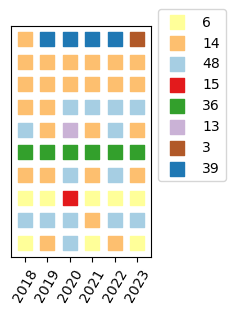

In [129]:
plt = plot_sequences(cluster_sequence[100:110], colors='Paired_r', x_labels=years)
plt.show()

In [155]:
possible_observations = [str(i) for i in range(0, 50)]
possible_states = ['0', '1', '2']
sequences = [[str(i) for i in seq] for seq in cluster_sequence]

In [141]:
from SimpleHOHMM import HiddenMarkovModelBuilder as Builder

In [156]:
builder = Builder()
hmm = builder.build_unsupervised(
    single_states=possible_states,
    all_obs=possible_observations,
    distribution='random',
    highest_order=3
)

In [157]:
hmm.display_parameters()

Starting probabilities (pi):
{'0': 0.39584250820912253, '2': 0.20451458841388298, '1': 0.39964290337699443}
{'0-0': 0.1882899290068273, '0-2': 0.060567341234905515, '0-1': 0.1704039149064021, '2-0': 0.10398176093151436, '2-2': 0.03370734546881159, '2-1': 0.1658018124719141, '1-0': 0.15591503911079832, '1-2': 0.10869474473593066, '1-1': 0.012638112132895982}
{'0-0-0': 0.029517270527860847, '0-0-2': 0.06160776185719798, '0-0-1': 0.04768184855963987, '0-2-0': 0.040549365677953544, '0-2-2': 0.019097522014313202, '0-2-1': 0.016425586143375994, '0-1-0': 0.04591646651550558, '0-1-2': 0.02900746294614823, '0-1-1': 0.06355873640960759, '2-0-0': 0.023638241854233303, '2-0-2': 0.05548011051241861, '2-0-1': 0.05294733043110554, '2-2-0': 0.030132517952017275, '2-2-2': 0.037815729122188335, '2-2-1': 0.07270215808087485, '2-1-0': 0.015034751121332039, '2-1-2': 0.07047491040393179, '2-1-1': 0.0007005826330605695, '1-0-0': 0.04864320891460746, '1-0-2': 0.009977939103353532, '1-0-1': 0.00119950746774134

In [158]:
hmm.learn(sequences, k_smoothing=0.001)

2

In [159]:
hmm.display_parameters()

Starting probabilities (pi):
{'0': 0.39584250820912253, '2': 0.20451458841388298, '1': 0.39964290337699443}
{'0-0': 0.1882899290068273, '0-2': 0.060567341234905515, '0-1': 0.1704039149064021, '2-0': 0.10398176093151436, '2-2': 0.03370734546881159, '2-1': 0.1658018124719141, '1-0': 0.15591503911079832, '1-2': 0.10869474473593066, '1-1': 0.012638112132895982}
{'0-0-0': 0.5320882339508495, '0-0-2': 0.2796682454623428, '0-0-1': 0.16487448455954393, '0-2-0': 0.0009737098344693283, '0-2-2': 0.0009737098344693283, '0-2-1': 0.0009737098344693283, '0-1-0': 0.0009737098344693283, '0-1-2': 0.0009737098344693283, '0-1-1': 0.0009737098344693283, '2-0-0': 0.0009737098344693283, '2-0-2': 0.0009737098344693283, '2-0-1': 0.0009737098344693283, '2-2-0': 0.0009737098344693283, '2-2-2': 0.0009737098344693283, '2-2-1': 0.0009737098344693283, '2-1-0': 0.0009737098344693283, '2-1-2': 0.0009737098344693283, '2-1-1': 0.0009737098344693283, '1-0-0': 0.0009737098344693283, '1-0-2': 0.0009737098344693283, '1-0-1'

In [168]:
obs = ['14', '14', '14']
print(hmm.evaluate(obs))
print(hmm.decode(obs))

0.15555535367621995
['1', '1', '0']
